In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA al Dataframe 'df_games'


In [2]:
df_games = pd.read_parquet('..\\data\\steam_games_etl_comprimido.parquet')

In [3]:
df_games.head()

,genres,app_name,release_date,id
0,['Action' 'Casual' 'Indie' 'Simulation' 'Strat...,Lost Summoner Kitty,2018-01-04,761140
1,['Free to Play' 'Indie' 'RPG' 'Strategy'],Ironbound,2018-01-04,643980
2,['Casual' 'Free to Play' 'Indie' 'Simulation' ...,Real Pool 3D - Poolians,2017-07-24,670290
3,['Action' 'Adventure' 'Casual'],弹炸人2222,2017-12-07,767400
5,['Action' 'Adventure' 'Simulation'],Battle Royale Trainer,2018-01-04,772540


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28832 entries, 0 to 32131
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28832 non-null  object        
 1   app_name      28832 non-null  object        
 2   release_date  28547 non-null  datetime64[ns]
 3   id            28832 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 1013.6+ KB


In [5]:
df_games.describe()

,release_date,id
count,28547,2.883200e+04
mean,2015-05-26 10:28:40.362910464,4.410096e+05
min,1983-06-19 00:00:00,1.000000e+01
25%,2014-10-24 00:00:00,3.180425e+05
50%,2016-04-23 00:00:00,4.354100e+05
75%,2017-04-19 00:00:00,5.864625e+05
max,2021-12-31 00:00:00,2.028850e+06
std,NaN,1.851177e+05


In [6]:
df_games.isnull().sum()

genres            0
app_name          0
release_date    285
id                0
dtype: int64

### EDA al Dataframe 'df_items'

In [9]:
df_items = pd.read_parquet('..\\data\\users_items_etl_comprimido.parquet')

In [10]:
df_items.head()

,item_id,item_name,playtime_2weeks,playtime_forever,user_id
3160655,730,Counter-Strike: Global Offensive,170.0,33832.0,76561198085260449
1976055,45750,Lost Planet 2,0.0,346.0,76561198058192281
1465834,17300,Crysis,0.0,931.0,hentaitentaclegangbang
699781,262410,World of Guns: Gun Disassembly,0.0,58.0,4KnightArtorias
302265,218230,PlanetSide 2,0.0,9549.0,thebraminator


In [11]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328525 entries, 3160655 to 773161
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_id           328525 non-null  int32  
 1   item_name         328525 non-null  object 
 2   playtime_2weeks   328525 non-null  float32
 3   playtime_forever  328525 non-null  float32
 4   user_id           328525 non-null  object 
dtypes: float32(2), int32(1), object(2)
memory usage: 11.3+ MB


In [12]:
df_items.describe()

,item_id,playtime_2weeks,playtime_forever
count,328525.000000,328525.000000,328525.000000
mean,177159.783280,13.934245,1556.025879
std,126807.074789,172.749542,6757.381348
min,10.000000,0.000000,1.000000
25%,39000.000000,0.000000,44.000000
50%,214950.000000,0.000000,204.000000
75%,263280.000000,0.000000,807.000000
max,527340.000000,19719.000000,530882.000000


In [13]:
df_items.isnull().sum()

item_id             0
item_name           0
playtime_2weeks     0
playtime_forever    0
user_id             0
dtype: int64

In [14]:
# Eliminar columnas no numéricas del DataFrame
df_numeric = df_items.select_dtypes(include=['number'])  # Seleccionar solo columnas numéricas
matriz_correlacion = df_numeric.corr()  # Calcular la matriz de correlación
matriz_correlacion

,item_id,playtime_2weeks,playtime_forever
item_id,1.00000,0.006770,-0.099660
playtime_2weeks,0.00677,1.000000,0.292092
playtime_forever,-0.09966,0.292092,1.000000


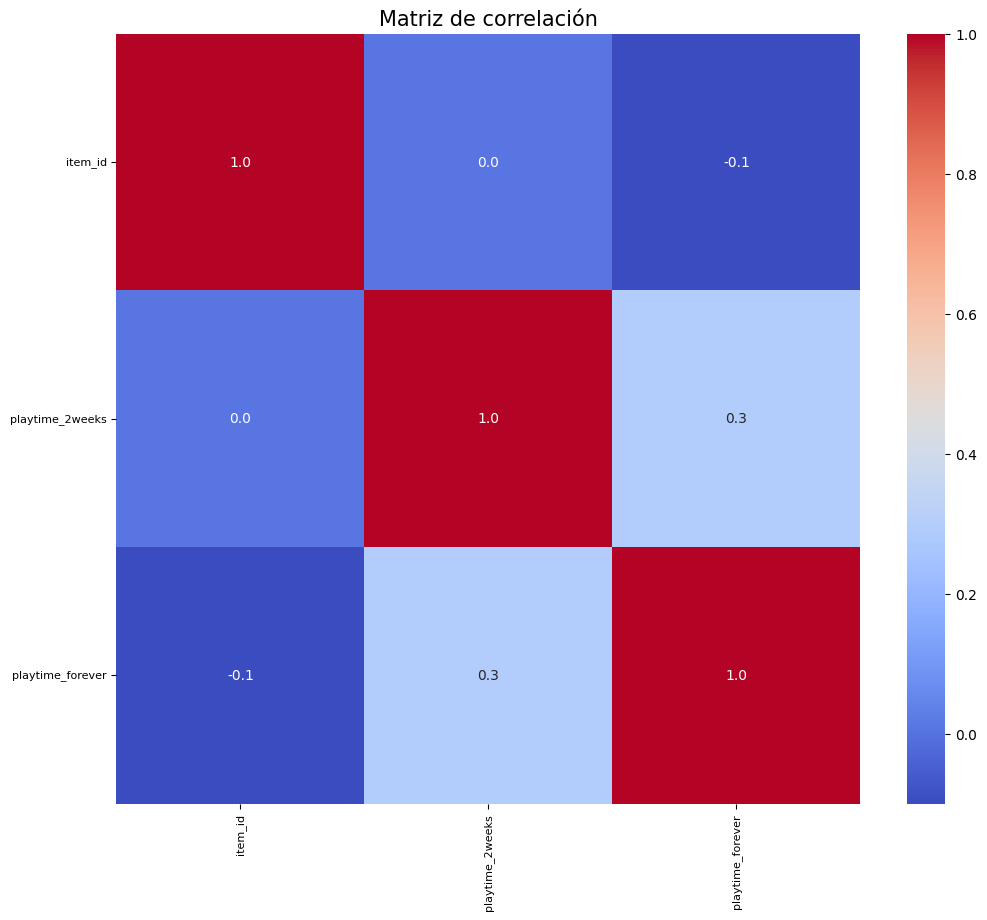

In [15]:
# Ajustar el tamaño de la figura del mapa de calor
plt.figure(figsize=(12, 10))

# Visualizar la matriz de correlación como un mapa de calor
heatmap = sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".1f")

# Ajustar el tamaño de la fuente de los valores anotados
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=8)

# Añadir título al mapa de calor
plt.title('Matriz de correlación', fontsize=15)

# Mostrar el mapa de calor
plt.show()

### EDA al Dataframe 'df_reviews'

In [16]:
df_reviews = pd.read_parquet('..\\data\\users_reviews_etl_comprimido.parquet')

In [17]:
df_reviews.head()

,user_id,date,sentiment_analysis
0,76561197970982479,2011,2
1,76561197970982479,2011,2
2,76561197970982479,2011,2
3,js41637,2014,2
4,js41637,2013,0


In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49186 entries, 0 to 59276
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             49186 non-null  object
 1   date                49186 non-null  object
 2   sentiment_analysis  49186 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [19]:
df_reviews.describe()

,sentiment_analysis
count,49186.000000
mean,1.533526
std,0.845792
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [20]:
df_items.isnull().sum()

item_id             0
item_name           0
playtime_2weeks     0
playtime_forever    0
user_id             0
dtype: int64